In [33]:
import HelloCFR: HelloCFR, MatrixGame, MatrixPlayer, update_strategy!, finalize_strategy!, gen_action, SimpleIIGame, SimpleIIPlayer
using Plots

# Regret Matching

In [34]:
function regret(game::MatrixGame, i::Int, a1::Int, a2::Int)
    u = game.R[a1,a2][i]
    if i == 1
        return [game.R[a,a2][i] - u for a in 1:size(game.R, i)]
    elseif i == 2
        return [game.R[a1,a][i] - u for a in 1:size(game.R, i)]
    end
end

function train_both!(p1::MatrixPlayer, p2::MatrixPlayer, N::Int)
    for i in 1:N
        a1, a2 = gen_action(p1), gen_action(p2)

        p1.regret_sum .+= regret(p1.game, 1, a1, a2)
        p2.regret_sum .+= regret(p2.game, 2, a1, a2)

        update_strategy!(p1) # proportional to regret sum
        update_strategy!(p2)
    end
    finalize_strategy!(p1)
    finalize_strategy!(p2)
end

train_both! (generic function with 1 method)

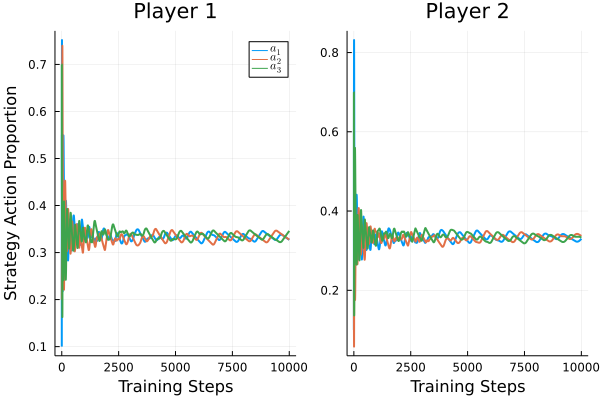

In [35]:
RPS = MatrixGame([
    (0,0) (-1,1) (1,-1);
    (1,-1) (0,0) (-1,1);
    (-1,1) (1,-1) (0,0)
])

init_strategy = [0.1,0.2,0.7]

p1 = MatrixPlayer(RPS, 1, copy(init_strategy))
p2 = MatrixPlayer(RPS, 2, copy(init_strategy))

train_both!(p1, p2, 10_000)
plot(p1, p2, lw=2)

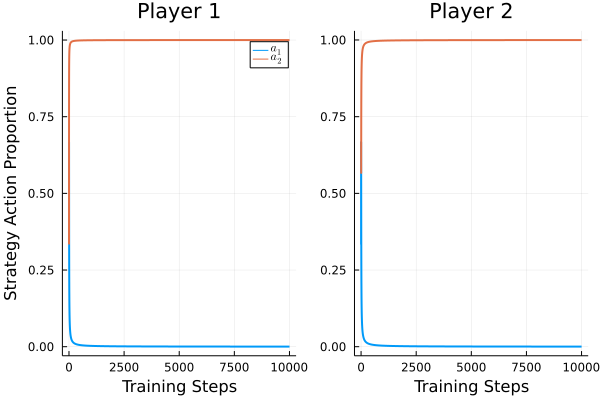

In [40]:
BOS = MatrixGame([
    (2,1) (0,0);
    (0,0) (1,2)    
])

p1 = MatrixPlayer(BOS, 1, [2/3,1/3])
p2 = MatrixPlayer(BOS, 2, [1/3,2/3])

train_both!(p1, p2, 10_000)
plot(p1, p2, lw=2)

# Counterfactual Regret Minimization

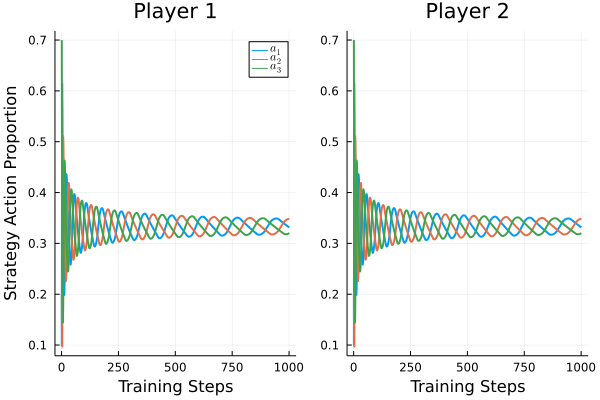

In [38]:
game = SimpleIIGame([
    (0,0) (-1,1) (1,-1);
    (1,-1) (0,0) (-1,1);
    (-1,1) (1,-1) (0,0)
])

p1 = SimpleIIPlayer(game,1, [0.1,0.2,0.7])
p2 = SimpleIIPlayer(game,2, [0.1,0.2,0.7])

HelloCFR.train_both!(p1,p2,1000)
plot(p1, p2, lw=2)